In [ ]:
pip install tensorflow

In [2]:
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.metrics import confusion_matrix

In [3]:
# 定义数据目录和子目录（每个子目录对应一个类别）
data_dir = r'D:\jupyter\tester' 
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')
test_dir = os.path.join(data_dir, 'test')
# 创建目标目录
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
# 定义类别列表
classes = ['cataract', 'normal', 'surgery'] 
num_classes = len(classes)
print(classes)

['cataract', 'normal', 'surgery']


In [4]:
all_data_info = []

for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    images = os.listdir(class_dir)
    for img in images:
        all_data_info.append((img, class_name))
# 获取所有图片名和对应label
images, labels = zip(*all_data_info)

# 按比例划分数据集
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.3, random_state=42)
validation_images, test_images, validation_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.5, random_state=42)


In [5]:
# 划分训练集
for img, label in zip(train_images, train_labels):
    src = os.path.join(data_dir, label, img)
    dst = os.path.join(train_dir, label, img)
    os.makedirs(os.path.join(train_dir, label), exist_ok=True)
    shutil.copy(src, dst)

# 划分验证集
for img, label in zip(validation_images, validation_labels):
    src = os.path.join(data_dir, label, img)
    dst = os.path.join(validation_dir, label, img)
    os.makedirs(os.path.join(validation_dir, label), exist_ok=True)
    shutil.copy(src, dst)

# 划分测试集
for img, label in zip(test_images, test_labels):
    src = os.path.join(data_dir, label, img)
    dst = os.path.join(test_dir, label, img)
    os.makedirs(os.path.join(test_dir, label), exist_ok=True)
    shutil.copy(src, dst)

将分类标签分成训练集、验证集和测试集

In [6]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

加载包

In [7]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# 加载图像并进行预处理
def load_and_preprocess_data(data_dir, classes, target_size=(256, 256)):
    all_images = []
    all_labels = []

    for class_name in classes:
        class_dir = os.path.join(data_dir, class_name)
        images = os.listdir(class_dir)
        for img in images:
            img_path = os.path.join(class_dir, img)
            img = image.load_img(img_path, target_size=target_size)
            img = image.img_to_array(img)
            img = preprocess_input(img) 
            all_images.append(img)
            all_labels.append(class_name)

    all_images = np.array(all_images)
    all_labels = np.array(all_labels)

    # 独热编码标签
    label_to_index = {class_name: i for i, class_name in enumerate(classes)}
    all_labels = np.array([label_to_index[label] for label in all_labels])
    all_labels = to_categorical(all_labels, num_classes=len(classes))

    return all_images, all_labels

# 重新加载并预处理数据
train_images, train_labels = load_and_preprocess_data(train_dir, classes)
validation_images, validation_labels = load_and_preprocess_data(validation_dir, classes)
test_images, test_labels = load_and_preprocess_data(test_dir, classes)

归一化，one-hot数据预处理

In [8]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D
# 使用更深的卷积神经网络架构
input_shape = (256, 256, 3)
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# 使用学习率调度策略
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
# 在调用 model.fit 之前，设置完整的模型权重
model.build((None, 256, 256, 3))  
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 256)       0

In [9]:
# 创建经过数据增强的数据生成器
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow(train_images, train_labels, batch_size=32)

epochs = 20  
batch_size = 32
history = model.fit(
    train_generator,
    steps_per_epoch = len(train_images) // batch_size,
    epochs=epochs,
    validation_data=(validation_images, validation_labels)
)


Epoch 1/20
67/67 [==============================] - 228s 3s/step - loss: 1.7921 - accuracy: 0.4930 - val_loss: 0.7792 - val_accuracy: 0.6217
Epoch 2/20
67/67 [==============================] - 215s 3s/step - loss: 0.7678 - accuracy: 0.6059 - val_loss: 0.6488 - val_accuracy: 0.6935
Epoch 3/20
67/67 [==============================] - 233s 3s/step - loss: 0.6848 - accuracy: 0.6646 - val_loss: 0.6163 - val_accuracy: 0.7304
Epoch 4/20
67/67 [==============================] - 246s 4s/step - loss: 0.6825 - accuracy: 0.6698 - val_loss: 0.6768 - val_accuracy: 0.7043
Epoch 5/20
67/67 [==============================] - 196s 3s/step - loss: 0.6550 - accuracy: 0.6940 - val_loss: 0.5533 - val_accuracy: 0.7239
Epoch 6/20
67/67 [==============================] - 197s 3s/step - loss: 0.5581 - accuracy: 0.7719 - val_loss: 0.4687 - val_accuracy: 0.8174
Epoch 7/20
67/67 [==============================] - 192s 3s/step - loss: 0.5212 - accuracy: 0.8055 - val_loss: 0.4950 - val_accuracy: 0.7674
Epoch 8/20
67

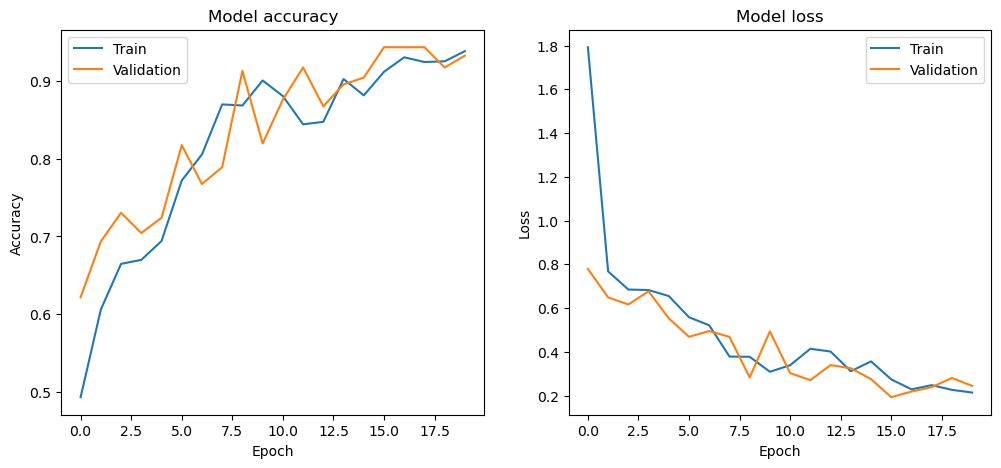

In [10]:
# 训练过程可视化
import matplotlib.pyplot as plt

# 绘制训练 & 验证的准确率值
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# 绘制训练 & 验证的损失值
plt.subplot(1, 2, 2) 
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

15/15 [==============================] - 9s 591ms/step


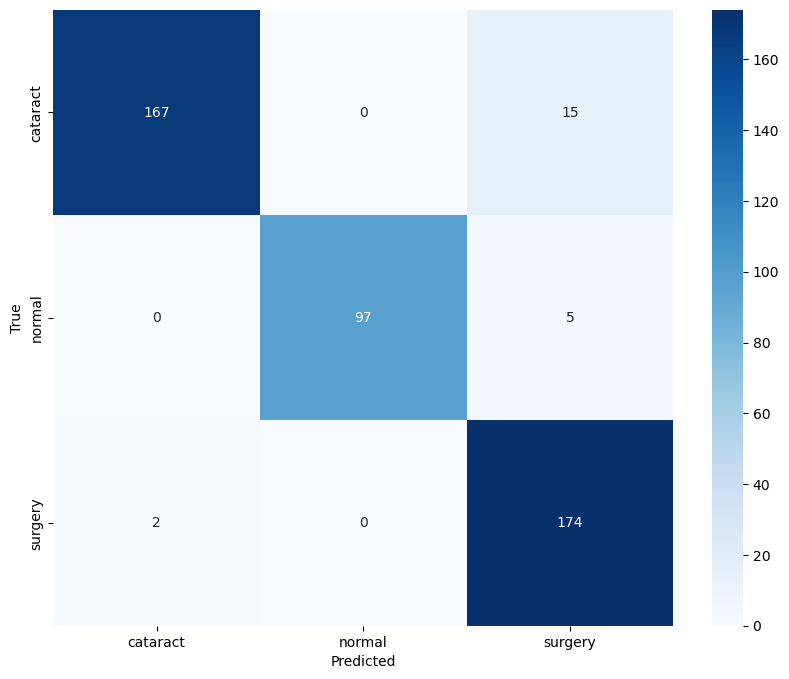

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
label_to_index = {class_name: index for index, class_name in enumerate(classes)}

# 对测试集进行预测
predictions = model.predict(test_images)

# 获取预测类别
predicted_classes = np.argmax(predictions, axis=1)

# 将 test_labels 转换为对应的类别名称
true_labels = [classes[np.argmax(label)] for label in test_labels]

# 将类别名称转换为对应的索引
true_classes = np.array([label_to_index[label] for label in true_labels])

# 计算混淆矩阵
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

# 显示混淆矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [13]:
import keras

# 指定你的路径
model_path = r'C:\Users\mike\Desktop\my_model.h5'
weights_path = r'C:\Users\mike\Desktop\my_model_weights.h5'

# 保存模型
model.save(model_path)

# 保存模型权重
model.save_weights(weights_path)